In [1]:
import numpy as np
np.random.seed(1337)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import IPython
import IPython.display as ipd  # To play sound in the notebook
from tqdm import tqdm

In [55]:
def randomSample(path, train, num_random_fnames = 100):
    fnames = train.fname
    labels = train.label

    random_indices = np.random.choice(range(len(fnames)), num_random_fnames)
    return zip(*[(path + fnames[i + 1], labels[i + 1]) for i in random_indices])

In [64]:
def drawSpectrogramForIndex(fnames, index):
    fname = fnames[index]
    log_spectrogram, sample_rate = getSpectrogram(fname)
    drawSpectrogram(log_spectrogram, sample_rate, label=labels[index])
    return ipd.Audio(fname)

def getSpectrograms(fnames):
    spectrograms = []
    for fname in tqdm(fnames):
        spectrograms += [getSpectrogram(fname)]
    return spectrograms

def getSpectrogram(fname):
    wav, sample_rate = librosa.load(fname)
    spectrogram = librosa.feature.melspectrogram(wav, sr=sample_rate, n_mels=256)
    log_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
    return log_spectrogram, sample_rate

def drawSpectrogram(log_spectrogram, sample_rate, label):
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.title('Mel Power Spectrogram: ' + label)
    plt.colorbar(format='%d dB')
    plt.tight_layout()
    plt.show()
    
def inspect(fnames, labels, index):
    drawSpectrogram(*spectrograms[index], labels[index])
    return ipd.Audio(fnames[index])

In [65]:
train = pd.read_csv("train.csv")
test = pd.read_csv("sample_submission.csv")
fnames, labels = randomSample('audio_train/', train)
spectrograms = getSpectrograms(fnames)

100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


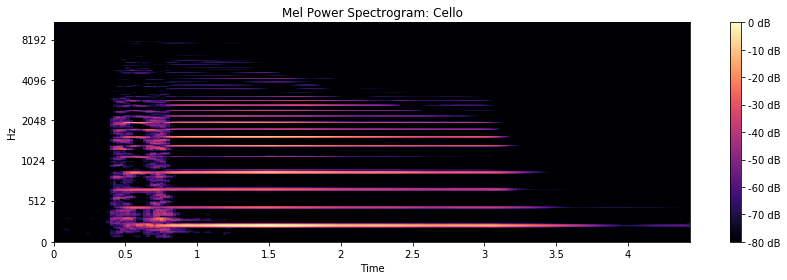

In [66]:
inspect(fnames, labels, 0)

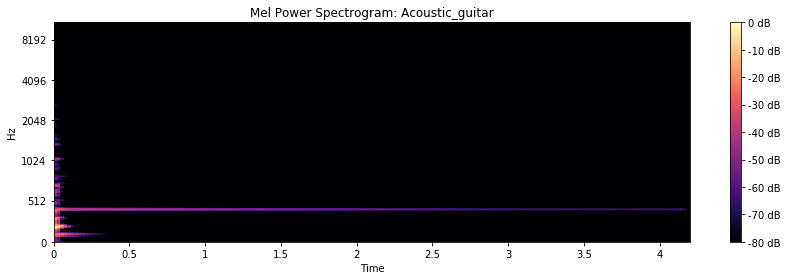

In [67]:
inspect(fnames, labels, 1)

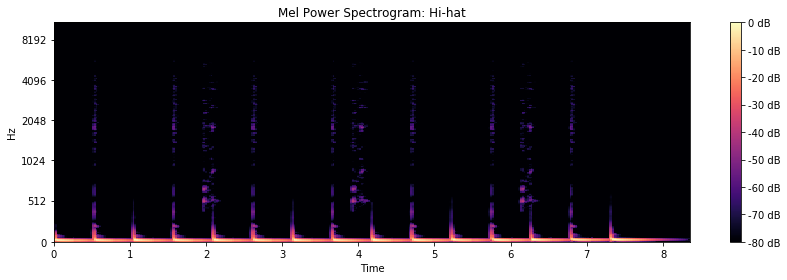

In [68]:
inspect(fnames, labels, 2)

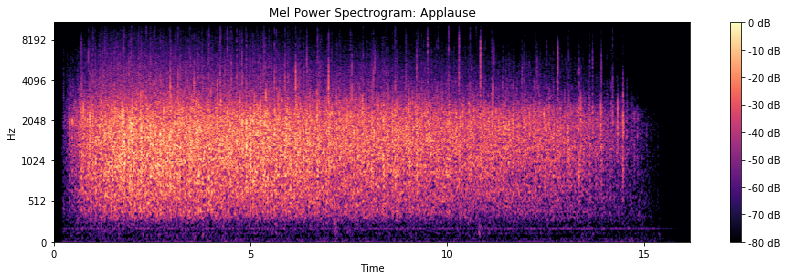

In [69]:
inspect(fnames, labels, 3)